In [3]:
import pandas as pd

# Update the file path to your dataset
desktop_path = '/Users/gaiadibernardini/Desktop/'
file_name = 'AK_data_labeled.csv'
data = pd.read_csv(desktop_path + file_name)

# Print the shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (1836, 972)


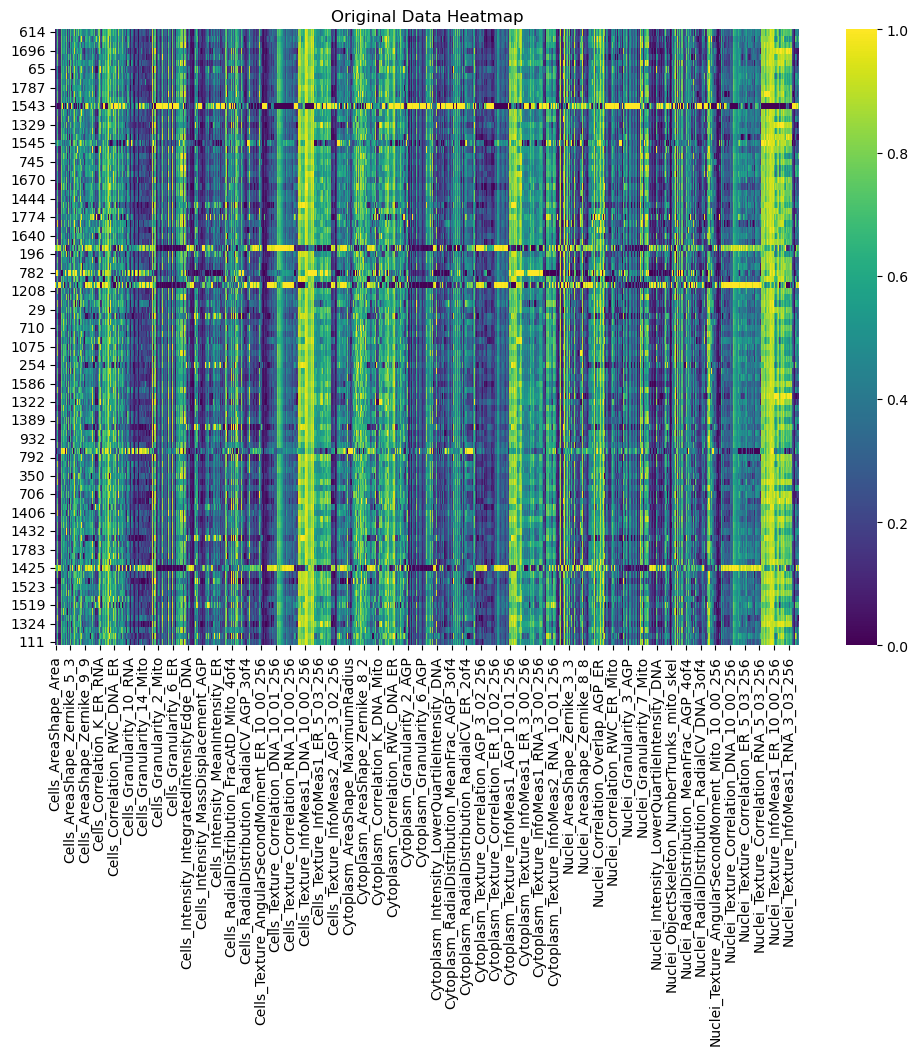

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
desktop_path = '/Users/gaiadibernardini/Desktop/'
file_name = 'AK_data_labeled.csv'
data = pd.read_csv(desktop_path + file_name)

# Remove non-numeric columns and take a subset of the data for faster visualization
subset_data = data.iloc[:, 8:].sample(n=100, random_state=42)

# Normalize the data
normalized_data = (subset_data - subset_data.min()) / (subset_data.max() - subset_data.min())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data, cmap='viridis', annot=False)
plt.title('Original Data Heatmap')
plt.show()


Epoch 1/50
58/58 [==============================] - 1s 2ms/step - loss: 637.2731
Epoch 2/50
58/58 [==============================] - 0s 2ms/step - loss: 589.3139
Epoch 3/50
58/58 [==============================] - 0s 2ms/step - loss: 566.0908
Epoch 4/50
58/58 [==============================] - 0s 3ms/step - loss: 554.2787
Epoch 5/50
58/58 [==============================] - 0s 3ms/step - loss: 548.0202
Epoch 6/50
58/58 [==============================] - 0s 2ms/step - loss: 544.2760
Epoch 7/50
58/58 [==============================] - 0s 3ms/step - loss: 542.0505
Epoch 8/50
58/58 [==============================] - 0s 2ms/step - loss: 540.6335
Epoch 9/50
58/58 [==============================] - 0s 3ms/step - loss: 539.7186
Epoch 10/50
58/58 [==============================] - 0s 3ms/step - loss: 538.7142
Epoch 11/50
58/58 [==============================] - 0s 3ms/step - loss: 538.1830
Epoch 12/50
58/58 [==============================] - 0s 2ms/step - loss: 537.9227
Epoch 13/50
58/58 [======

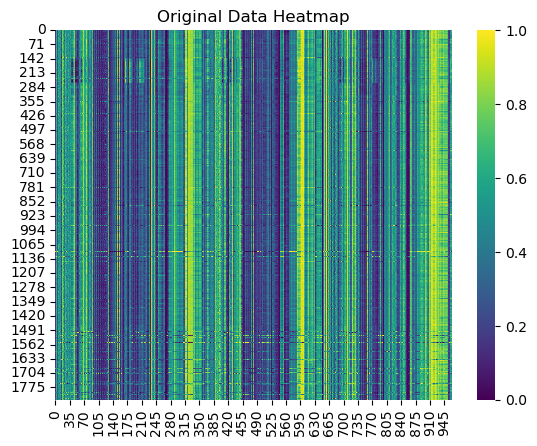

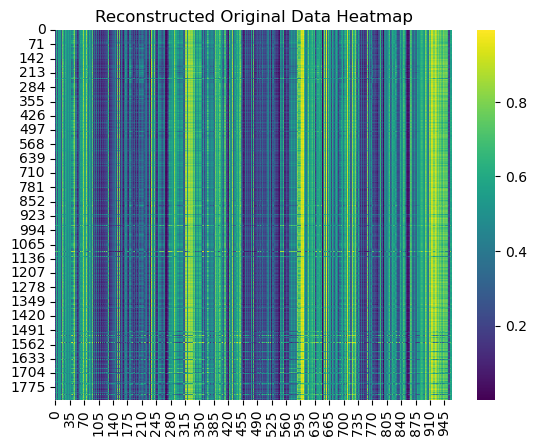

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import RMSprop

# Load data
desktop_path = '/Users/gaiadibernardini/Desktop/'
file_name = 'AK_data_labeled.csv'
data = pd.read_csv(desktop_path + file_name)

# Remove non-numeric columns
data = data.iloc[:, 8:]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Convert data to numpy array
data_normalized = data_normalized.astype('float32')

# Parameters
original_dim = data_normalized.shape[1]
intermediate_dim = 256
latent_dim = 2
batch_size = 32
epochs = 50

# VAE model
def build_vae():
    # Encoder
    inputs = Input(shape=(original_dim,))
    h = Dense(intermediate_dim, activation='relu')(inputs)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_h = Dense(intermediate_dim, activation='relu')
    decoder_mean = Dense(original_dim, activation='sigmoid')  # Keep 'sigmoid' activation
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # VAE model
    vae = Model(inputs, x_decoded_mean)

    # Loss function
    xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)

    vae.add_loss(vae_loss)

    # Compile the model with legacy RMSprop optimizer
    vae.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001))

    return vae

# Train the VAE
vae = build_vae()
vae.fit(data_normalized, epochs=epochs, batch_size=batch_size)

# Visualize the heatmap with 'viridis' colormap
decoded_data = vae.predict(data_normalized)

# Visualize the original data heatmap with 'viridis' colormap
sns.heatmap(data_normalized, cmap='viridis')
plt.title('Original Data Heatmap')
plt.show()

# Visualize the VAE heatmap with 'viridis' colormap
sns.heatmap(decoded_data, cmap='viridis')
plt.title('Reconstructed Original Data Heatmap')
plt.show()
